### Here is a Bike-sharing dataset from UCI-ML repository. 

URL: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset


Here in the given link we have three files present. 
    1. day.csv
    2. hour.csv
    3. readme
    
Day.csv file stores data of 2011 and 2012 in Capital bikeshare. And in hour.csv file we have records per hour for the same duration as day.csv.
As our task is to predict the number of daily rentals in this assignment, we will use day.csv file.

Lets understand the features present in this given csv file and their description.
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :  
                1: Clear, Few clouds, Partly cloudy, Partly cloudy
                2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## ML problem formulation

Time-series forecasting and Regression

- We need to find the number of rentals per day.

## Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.

## Lets load the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('day.csv')
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Check if any null value present
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null value present in our data.

## EDA and data cleaning

#### 1. dteday

Lets get the period from date field and plot a bar plot with bike rentals

In [39]:
import datetime
def get_month(input):
    date = datetime.datetime.strptime(input, "%Y-%m-%d")
    year = str(date.year)
    month = str(date.month)
    if len(month)==1:
        month = str('0')+month
    return year +'/' + month

date_df = pd.DataFrame()
date_df['period'] = data['dteday'].apply(get_month)
date_df['cnt'] = data['cnt']

date_df.head(5)

,period,cnt
0,2011/01,985
1,2011/01,801
2,2011/01,1349
3,2011/01,1562
4,2011/01,1600


In [42]:
date_df = date_df.groupby('period').mean()

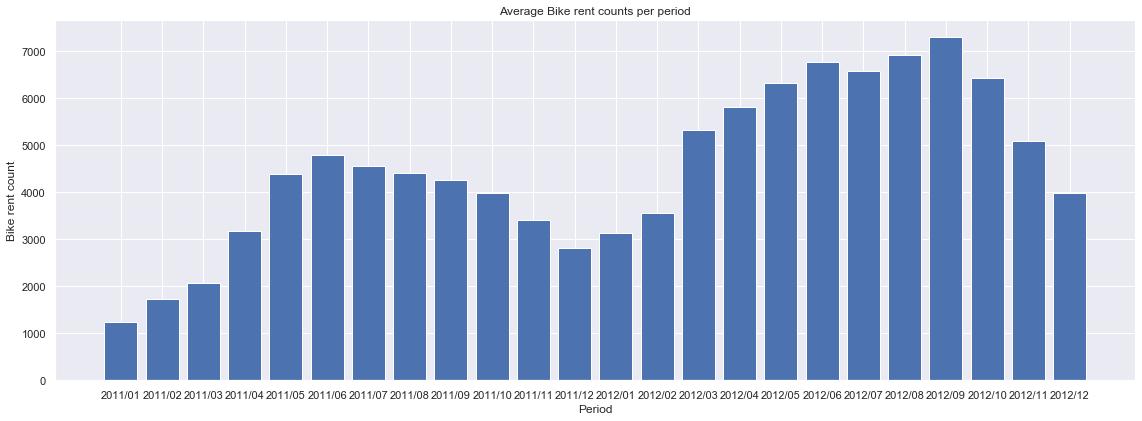

In [101]:
import seaborn as sns

fig = plt.figure(figsize=(15,5))
sns.set(font_scale = 1.0)
sns.set_style('darkgrid')
ax = fig.add_axes([0,0,1,1])
ax.bar(list(date_df['cnt'].index) ,list(date_df['cnt'].values))
plt.title('Average Bike rent counts per period')
plt.xlabel('Period')
plt.ylabel('Bike rent count')
plt.show()

From the above plot we can see that in 2012 there are more bike rentals than 2011. And 2012 sep month has the average highest rentals where as 2011 january has the lowest number of rentals.

### 2. season

We have three valid seasons
    -season (1:winter, 2:spring, 3:summer, 4:fall)

lets see the relation between season and rental counts

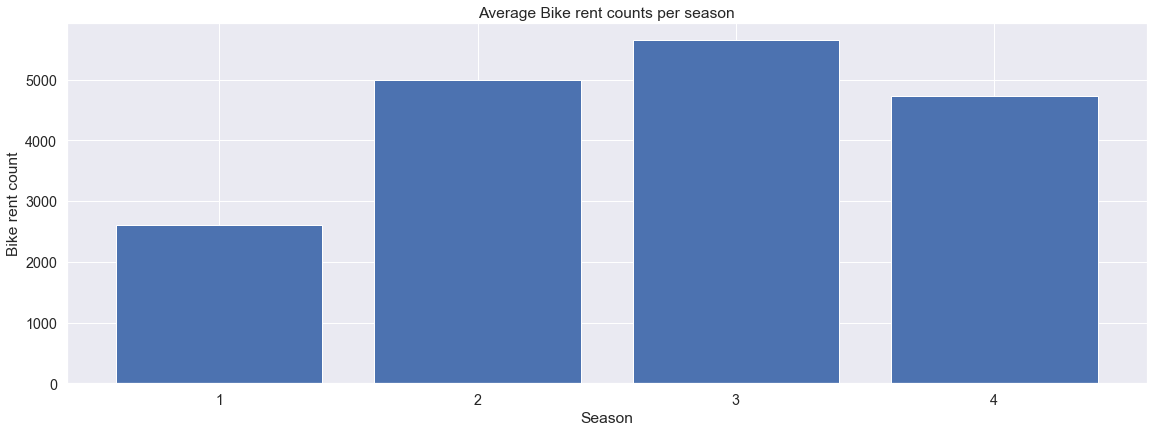

In [102]:
temp = data[['season', 'cnt']]
season_df = temp.groupby('season').mean()

fig = plt.figure(figsize=(15,5))
sns.set(font_scale = 1.3)
sns.set_style('darkgrid')
ax = fig.add_axes([0,0,1,1])
ax.bar(list(season_df['cnt'].index) ,list(season_df['cnt'].values))
plt.title('Average Bike rent counts per season')
plt.xlabel('Season')
plt.ylabel('Bike rent count')
plt.xticks(list(season_df['cnt'].index),[1,2,3,4])
plt.show()

As we can identify from the above plot that in summer we have the highest number of bike rentals followed by spring and fall and least rentals in winter season. It is quite understandable as people will not prefer to have bike ride in winter.

### 3. yr

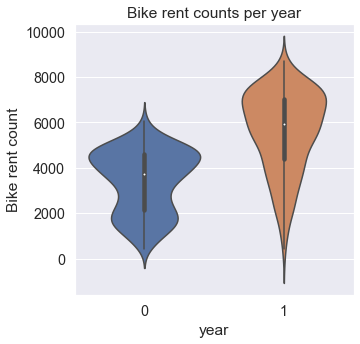

In [71]:
plt.figure(figsize =(5,5)) 
year = data['yr']
sns.violinplot(x = year,  y = data['cnt'])
plt.title('Bike rent counts per year')
plt.xlabel('year')
plt.ylabel('Bike rent count')
plt.show()

As we have seen earlier as well, inn 2012 there are more number of bike rentals than 2011.

### 4.mnth

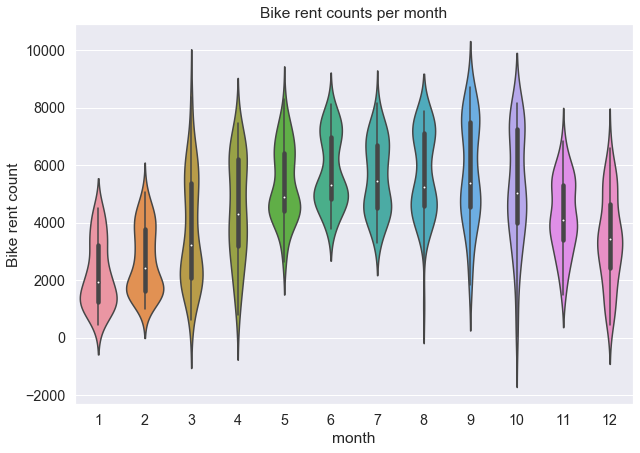

In [74]:
plt.figure(figsize =(10,7)) 
month = data['mnth']
sns.violinplot(x = month,  y = data['cnt'])
plt.title('Bike rent counts per month')
plt.xlabel('month')
plt.ylabel('Bike rent count')
plt.show()

Month 6,7 and 8 (i.e june july and aug) has more number of rentals. These are nothing but considered as summer.

### 5. holiday

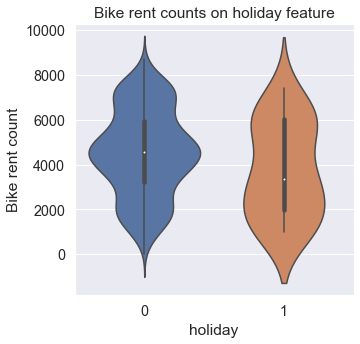

In [75]:
plt.figure(figsize =(5,5)) 
holiday = data['holiday']
sns.violinplot(x = holiday,  y = data['cnt'])
plt.title('Bike rent counts on holiday feature')
plt.xlabel('holiday')
plt.ylabel('Bike rent count')
plt.show()

Here 1 means its a holiday.
Here both the plots are overlapping. As per the plot we can see that during holiday the average count for bike rentals is near 3300 (brown color) and during non holidays the average bike rental count is above 4000 (nearly 4600) (blue color).
Also there are less holiday exists than non holidays which is expected.

### 6. weekday

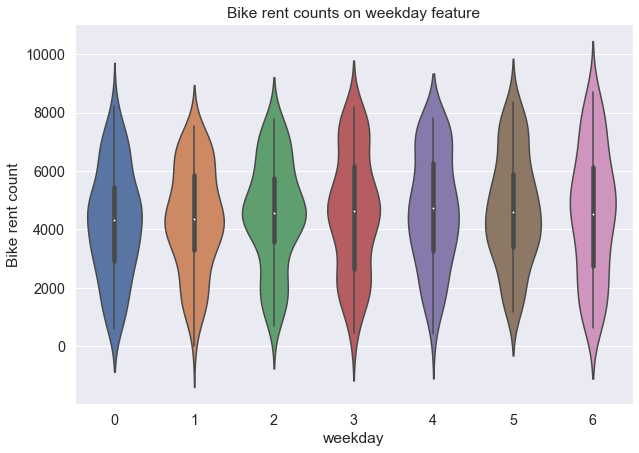

In [87]:
plt.figure(figsize =(10,7)) 
weekday = data['weekday']
sns.violinplot(x = weekday,  y = data['cnt'])
plt.title('Bike rent counts on weekday feature')
plt.xlabel('weekday')
plt.ylabel('Bike rent count')
plt.show()

In [99]:
input = data['dteday'].iloc[0]
print('date : {} and weekday: {}'.format(input, data['weekday'].iloc[0]))

date = datetime.datetime.strptime(input, "%Y-%m-%d")
print('dayname: {} '.format(date.strftime("%A")))

date : 2011-01-01 and weekday: 6
dayname: Saturday 


There are more rentals on weekday 0 and 6, i.e sunday and saturday and comparatively less in during week days.

### 7. workingday

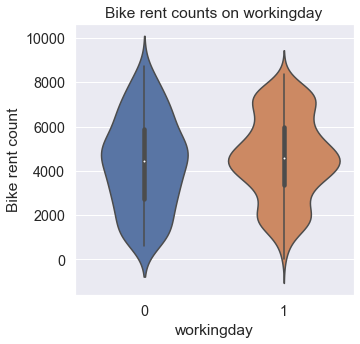

In [100]:
plt.figure(figsize =(5,5)) 
workingday = data['workingday']
sns.violinplot(x = workingday,  y = data['cnt'])
plt.title('Bike rent counts on workingday')
plt.xlabel('workingday')
plt.ylabel('Bike rent count')
plt.show()

if day is neither weekend nor holiday is 1, otherwise is 0

From the plot we can see there are less numbers of high rental counts present during weekend or holiday and more number of less rental counts present during working days. This is ovious as perople tends to go out in weekend and holidays and hence the rents counts are increased on these days, but the number of weekend and holidays are less compared to working days.

### 8. weathersit

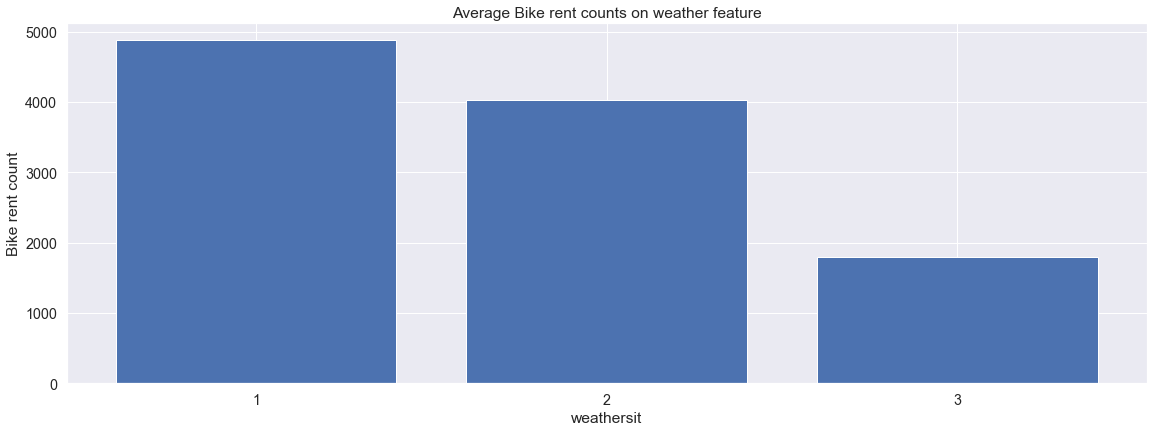

In [103]:
temp = data[['weathersit', 'cnt']]
weathersit_df = temp.groupby('weathersit').mean()

fig = plt.figure(figsize=(15,5))
sns.set(font_scale = 1.3)
sns.set_style('darkgrid')
ax = fig.add_axes([0,0,1,1])
ax.bar(list(weathersit_df['cnt'].index) ,list(weathersit_df['cnt'].values))
plt.title('Average Bike rent counts on weather feature')
plt.xlabel('weathersit')
plt.ylabel('Bike rent count')
plt.xticks(list(weathersit_df['cnt'].index),[1,2,3,4])
plt.show()

From description we know weathersit feature has
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
But as per the plot there are no records of 'weathersit == 4'

So average bike rentals counts are more when the weather is clear.

### 9. temp 

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

In [116]:
def getVal(min1,max1,norm):
    return norm*(max1-min1) + min1

This feature is already normalized with t_min = 8 and t_max = 39

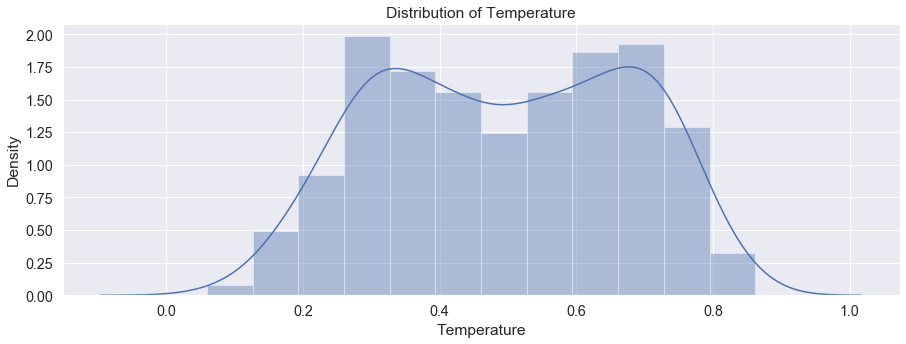

In [113]:
temp = data[['temp','cnt']]
temp = temp.sort_values('temp')

plt.figure(figsize=(15,5))
sns.set(font_scale = 1.3)
sns.set_style('darkgrid')
ax = sns.distplot(temp.temp)

plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()

In [125]:
print('More offen temperature stays between {:.1f} and {:.1f} degree celsius'.format(getVal(8,39,0.3),getVal(8,39,0.7)))

More offen temperature stays between 17.3 and 29.7 degree celsius


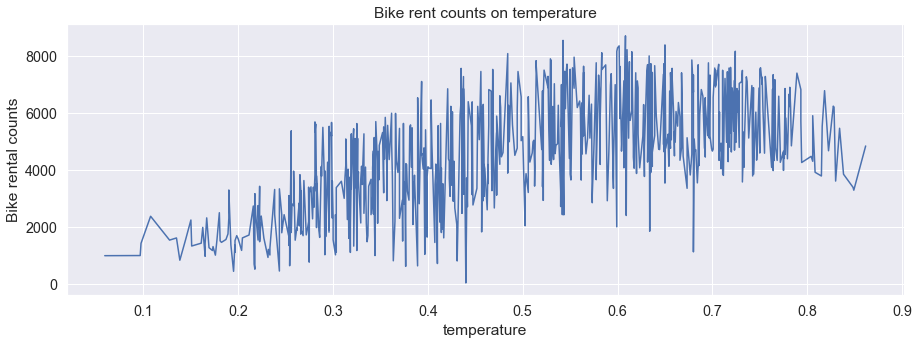

In [108]:
fig = plt.figure(figsize=(15,5))
plt.plot(temp['temp'], temp['cnt'])
plt.ylabel('Bike rental counts')
plt.xlabel('temperature')
plt.title('Bike rent counts on temperature')
plt.show()

In [126]:
print('Bike rental counts are more when temperature is near {:.1f} degree \
celsius and very less when it is near {:.1f} degree celsius'.format(getVal(8,39,0.6),getVal(8,39,0.1)))

Bike rental counts are more when temperature is near 26.6 degree celsius and very less when it is near 11.1 degree celsius


### 10. atemp

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

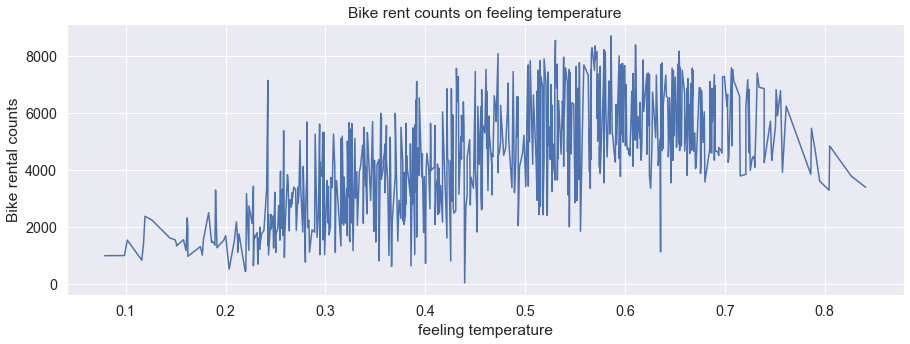

In [109]:
temp = data[['atemp','cnt']]
temp = temp.sort_values('atemp')

fig = plt.figure(figsize=(15,5))
plt.plot(temp['atemp'], temp['cnt'])
plt.ylabel('Bike rental counts')
plt.xlabel('feeling temperature')
plt.title('Bike rent counts on feeling temperature')
plt.show()

In [128]:
print('Similar to temerature bike rental counts are more when feeling \
temperature is near {:.1f} degree Celsius and very less when it is near {:.1f} degree celsius.'
      .format(getVal(16,50,0.6),getVal(16,50,0.1)))

Similar to temerature bike rental counts are more when feeling temperature is near 36.4 degree Celsius and very less when it is near 19.4 degree celsius.


### 11. hum

hum: Normalized humidity. The values are divided to 100 (max)

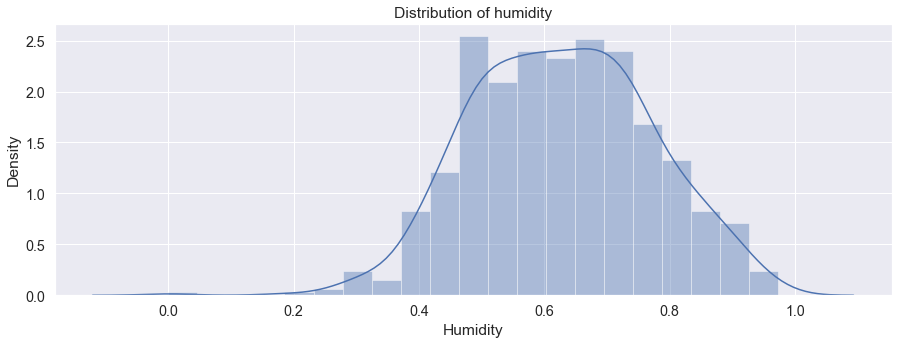

In [111]:
temp = data[['hum','cnt']]
temp = temp.sort_values('hum')

plt.figure(figsize=(15,5))
sns.set(font_scale = 1.3)
sns.set_style('darkgrid')
ax = sns.distplot(temp.hum)

plt.title('Distribution of humidity')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.show()

Most of the time humidity remanins between 0.55 to 0.65.

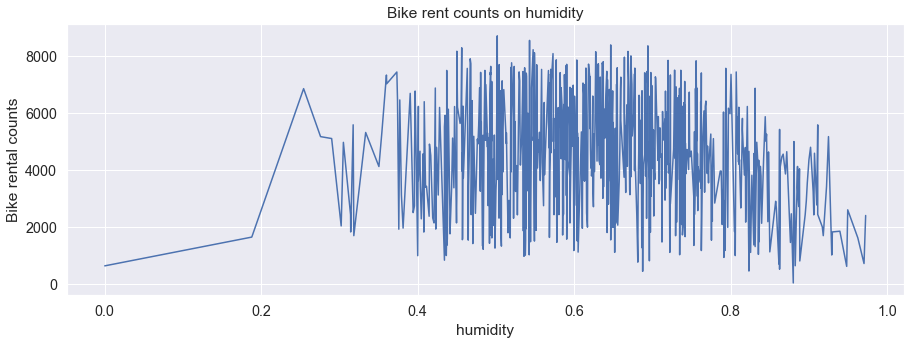

In [110]:
fig = plt.figure(figsize=(15,5))
plt.plot(temp['hum'], temp['cnt'])
plt.ylabel('Bike rental counts')
plt.xlabel('humidity')
plt.title('Bike rent counts on humidity')
plt.show()

Bike rental counts are more when humidy is near 0.5.

### 12. windspeed

windspeed: Normalized wind speed. The values are divided to 67 (max)

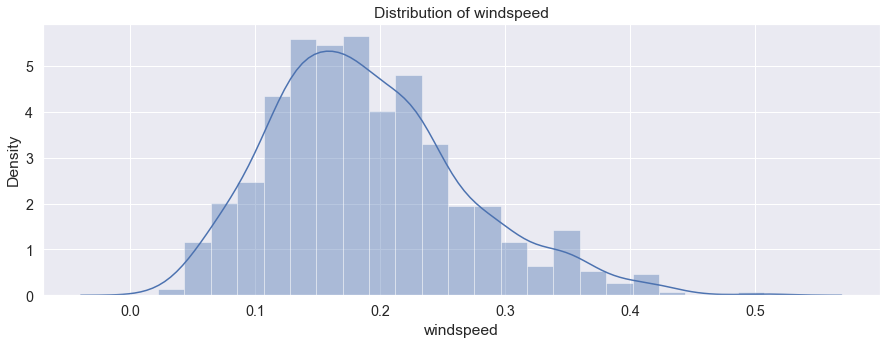

In [114]:
temp = data[['windspeed','cnt']]
temp = temp.sort_values('windspeed')

plt.figure(figsize=(15,5))
sns.set(font_scale = 1.3)
sns.set_style('darkgrid')
ax = sns.distplot(temp.windspeed)

plt.title('Distribution of windspeed')
plt.xlabel('windspeed')
plt.ylabel('Density')
plt.show()

From the above plot we can see that most of the time windspeed will be near normalized value of 0.15. 

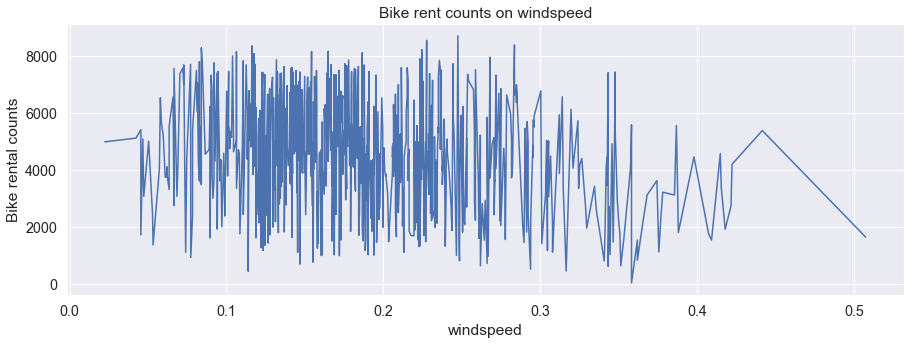

In [115]:
fig = plt.figure(figsize=(15,5))
plt.plot(temp['windspeed'], temp['cnt'])
plt.ylabel('Bike rental counts')
plt.xlabel('windspeed')
plt.title('Bike rent counts on windspeed')
plt.show()

### 13. casual

Casual: count of casual users

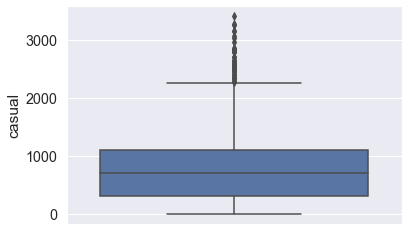

In [132]:
sns.boxplot(y="casual", data = data)
plt.show()

Most of the time Casual user count is between 300 to 1200.

In [133]:
#calculating casual users values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = data["casual"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 2
10 percentile value is 139
20 percentile value is 245
30 percentile value is 384
40 percentile value is 560
50 percentile value is 713
60 percentile value is 845
70 percentile value is 1022
80 percentile value is 1263
90 percentile value is 1869
100 percentile value is  3410


In [134]:
#calculating casual values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = data["casual"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 1869
91 percentile value is 1988
92 percentile value is 2135
93 percentile value is 2224
94 percentile value is 2282
95 percentile value is 2355
96 percentile value is 2512
97 percentile value is 2589
98 percentile value is 2708
99 percentile value is 2963
100 percentile value is  3410


Casual user count looks good and no outlier identified.

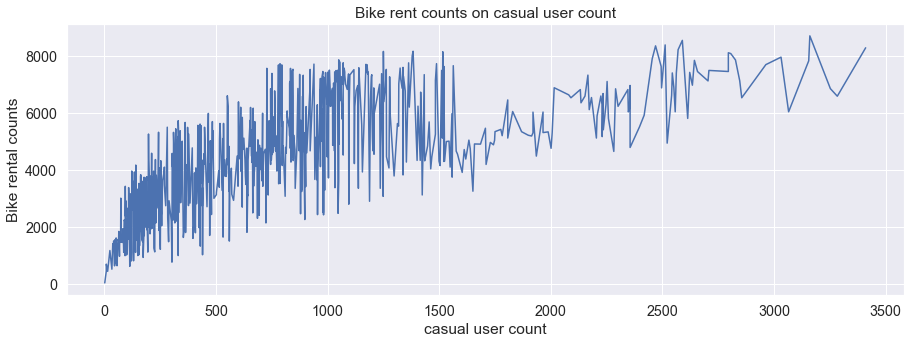

In [136]:
temp = data[['casual','cnt']]
temp = temp.sort_values('casual')

fig = plt.figure(figsize=(15,5))
plt.plot(temp['casual'], temp['cnt'])
plt.ylabel('Bike rental counts')
plt.xlabel('casual user count')
plt.title('Bike rent counts on casual user count')
plt.show()

From the above plot we can see that bike rental counts are more when casual user count is near 750 to 1500. 

### 14. registered

registered: count of registered users

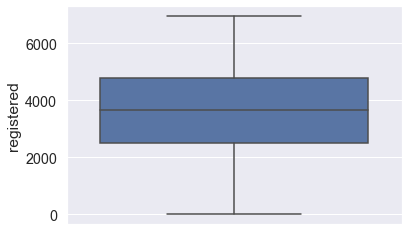

In [137]:
sns.boxplot(y="registered", data = data)
plt.show()

most of the time registered user count is between 2200 to 4900 which is more than casual user count. So we can say register user uses this bike rental service more than casual user.

In [138]:
#calculating registered users values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = data["registered"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 20
10 percentile value is 1506
20 percentile value is 2199
30 percentile value is 2808
40 percentile value is 3309
50 percentile value is 3662
60 percentile value is 3980
70 percentile value is 4444
80 percentile value is 5115
90 percentile value is 5893
100 percentile value is  6946


In [139]:
#calculating registered values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = data["registered"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5893
91 percentile value is 5988
92 percentile value is 6065
93 percentile value is 6149
94 percentile value is 6257
95 percentile value is 6281
96 percentile value is 6433
97 percentile value is 6501
98 percentile value is 6640
99 percentile value is 6790
100 percentile value is  6946


Register user count looks good and no outlier identified.

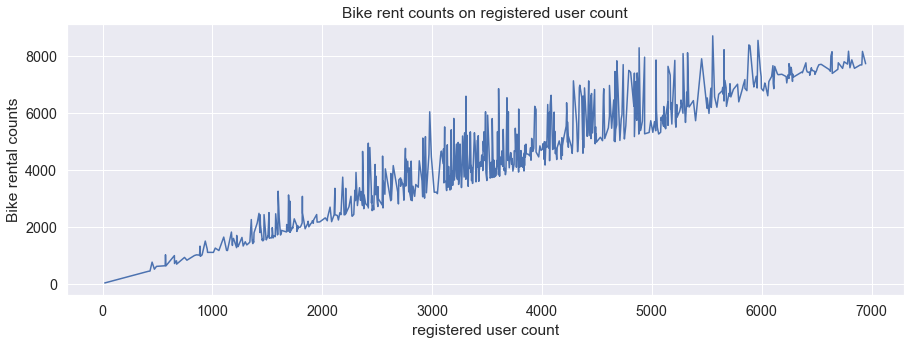

In [140]:
temp = data[['registered','cnt']]
temp = temp.sort_values('registered')

fig = plt.figure(figsize=(15,5))
plt.plot(temp['registered'], temp['cnt'])
plt.ylabel('Bike rental counts')
plt.xlabel('registered user count')
plt.title('Bike rent counts on registered user count')
plt.show()

From the above plot we can identify that the register user count is started from 0 at the very begining of 2011. And slowly the count of registered user got increased and reach to ~6900 at then end of 2012. As we have found earlier that register users uses this rental service than casual user and also from the above plot we can find as the number of register user count increases the total bike rental count also increases.

### 15: cnt - target variable

cnt : count of total rental bikes including both casual and registered

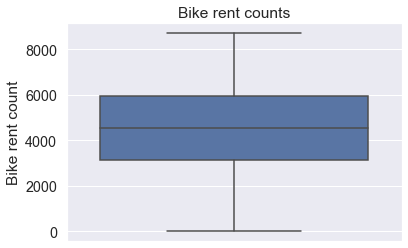

In [142]:
sns.boxplot(y="cnt", data = data)
plt.title('Bike rent counts')
plt.ylabel('Bike rent count')
plt.show()

Mostly bike rental counts are between 3000 to 6000. 

## Model and feature engineering

In [275]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [276]:
# our target is to predict 
col_name = ['instant']

filter_data = data.drop(columns=col_name, axis=1)

In [277]:
filter_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


lets divide total dataset in small clusters on week basis. So 1st week data is 1st clsuter, 2nd week data is 2nd cluster and so on.

In [208]:
def get_cluster_feature(df,col):
    
    fea_cluster = []
    n = df.shape[0]//7
    for i in range(n):
        fea_cluster.append(list(df[col][i*7:(i+1)*7].values))
    fea_cluster.append(list(df[col][(i+1)*7:].values))
    return fea_cluster

In [213]:
# cluster features in weekwise cluster
temp_cluster = get_cluster_feature(filter_data,'temp')
atemp_cluster = get_cluster_feature(filter_data,'atemp')
hum_cluster = get_cluster_feature(filter_data,'hum')
windspeed_cluster = get_cluster_feature(filter_data,'windspeed')

In [214]:
print('Total cluster created : {} '.format(len(temp_cluster)))

Total cluster created : 105 


### train test split

As this is a time series dataset, lets take first 100 cluster data as our trainset and remaining set as test data.

1st 100 cluster means --> 100*7 = 700 data points and remaining will be our test data.

In [278]:
print("size of train data :", len(filter_data[0:700]))
print("size of test data :", len(filter_data[700:]))

size of train data : 700
size of test data : 31


In [279]:
target = filter_data['cnt']
filter_data = filter_data.drop(columns=['dteday','cnt','casual','registered'], axis=1)

# train data
df_train = filter_data[0:700]
df_train_target = target[0:700]

# test data
df_test = filter_data[700:]
df_test_target = target[700:]

### Get top 2 amplitude values and their fourier transform as new features of our dataset for below columns
    - temp
    - atemp
    - hum
    - windspeed

In [280]:
def get_top_amp_freq(data):
    
    freq_f1 = []
    amp_f1 = []
    freq_f2 = []
    amp_f2 = []
    
    for i in range(len(data)):
        
        Y_amp = np.fft.fft(np.array(data[i]))
        X_freq = np.fft.fftfreq(7, 1)
        dict_ft = {}
        n = len(X_freq)

        # Create a dictonary with frequesny as key and amplitude as value 
        dict_ft = dict(zip(X_freq[:int(n/2)], (Y_amp)[:int(n/2)]))
        # sort the dictonary based on values (Y_amp)
        dict_ft_sorted = {k: v for k, v in sorted(dict_ft.items(), key=lambda item: item[1])}

        freq_f1.append(list(dict_ft_sorted.items())[0][0])   # add the frequency for the highest amplitude for single cluster 
        amp_f1.append(list(dict_ft_sorted.items())[0][1])    # add the hightest amplitude

        freq_f2.append(list(dict_ft_sorted.items())[1][0])   # add the frequencyfor 2nd highest amplitude for single cluster
        amp_f2.append(list(dict_ft_sorted.items())[1][1])    # add the 2nd hightest amplitude
    
    return np.abs(amp_f1), freq_f1, np.abs(amp_f2), freq_f2

In [281]:
from sklearn import preprocessing

col_name = ['temp','atemp','hum','windspeed']
feature_list = [temp_cluster, atemp_cluster, hum_cluster, windspeed_cluster]

for i, feature in enumerate(feature_list):
    tr_amp_f1, tr_freq_f1, tr_amp_f2, tr_freq_f2 = get_top_amp_freq(feature[0:100])
    te_amp_f1, te_freq_f1, te_amp_f2, te_freq_f2 = get_top_amp_freq(feature[100:])
    
    train_amp_f1 = sum([[(tr_amp_f1[i])]*7 for i in range(0,100)], [])
    train_freq_f1 = sum([[(tr_freq_f1[i])]*7 for i in range(0,100)] , [])
    train_amp_f2 = sum([[(tr_amp_f2[i])]*7 for i in range(0,100)], [])
    train_freq_f2 = sum([[(tr_freq_f2[i])]*7 for i in range(0,100)], [])

    # we are removing last 4 from test as we have only 3 days in last week in our dataset
    test_amp_f1 = sum([[(te_amp_f1[i])]*7 for i in range(0,5)], [])[:-4] 
    test_freq_f1 = sum([[(te_freq_f1[i])]*7 for i in range(0,5)],[])[:-4]
    test_amp_f2 = sum([[(te_amp_f2[i])]*7 for i in range(0,5)],[])[:-4]
    test_freq_f2 = sum([[(te_freq_f2[i])]*7 for i in range(0,5)],[])[:-4]
    
    min_max_scaler = preprocessing.MinMaxScaler()

    df_train[str(col_name[i])+'_amp_f1'] = min_max_scaler.fit_transform(np.array(train_amp_f1).reshape(-1,1))
    df_train[str(col_name[i])+'_freq_f1'] = train_freq_f1
    df_train[str(col_name[i])+'_amp_f2'] = min_max_scaler.fit_transform(np.array(train_amp_f2).reshape(-1, 1))
    df_train[str(col_name[i])+'_freq_f2'] = train_freq_f2
    
    df_test[str(col_name[i])+'_amp_f1'] = min_max_scaler.fit_transform(np.array(test_amp_f1).reshape(-1,1))
    df_test[str(col_name[i])+'_freq_f1'] = test_freq_f1
    df_test[str(col_name[i])+'_amp_f2'] = min_max_scaler.fit_transform(np.array(test_amp_f2).reshape(-1,1))
    df_test[str(col_name[i])+'_freq_f2'] = test_freq_f2

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [282]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'temp_amp_f1',
       'temp_freq_f1', 'temp_amp_f2', 'temp_freq_f2', 'atemp_amp_f1',
       'atemp_freq_f1', 'atemp_amp_f2', 'atemp_freq_f2', 'hum_amp_f1',
       'hum_freq_f1', 'hum_amp_f2', 'hum_freq_f2', 'windspeed_amp_f1',
       'windspeed_freq_f1', 'windspeed_amp_f2', 'windspeed_freq_f2'],
      dtype='object')

In [283]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,atemp_amp_f2,atemp_freq_f2,hum_amp_f1,hum_freq_f1,hum_amp_f2,hum_freq_f2,windspeed_amp_f1,windspeed_freq_f1,windspeed_amp_f2,windspeed_freq_f2
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,0.435419,0.142857,0.37924,0.285714,0.460609,0.142857,0.016318,0.285714,0.405632,0.142857
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,...,0.435419,0.142857,0.37924,0.285714,0.460609,0.142857,0.016318,0.285714,0.405632,0.142857
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,...,0.435419,0.142857,0.37924,0.285714,0.460609,0.142857,0.016318,0.285714,0.405632,0.142857
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,...,0.435419,0.142857,0.37924,0.285714,0.460609,0.142857,0.016318,0.285714,0.405632,0.142857
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,...,0.435419,0.142857,0.37924,0.285714,0.460609,0.142857,0.016318,0.285714,0.405632,0.142857


## Machine learning Model

### Use linear regression

In [284]:
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression().fit(df_train, df_train_target)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

### Use Ridge Regression

In [288]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

ridge = Ridge()
grid_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_result_ridge = grid_ridge.fit(df_train, df_train_target)

best_alpha = grid_result_ridge.best_params_
print('Best Params: ', grid_result_ridge.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    7.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    7.2s finished


In [289]:
ridge = Ridge(alpha=best_alpha['alpha']).fit(df_train, df_train_target)

y_pred = ridge.predict(df_test)
ridge_test_predictions = [round(value) for value in y_pred]

y_pred = ridge.predict(df_train)
ridge_train_predictions = [round(value) for value in y_pred]

### Using lasso Regression

In [291]:
from sklearn.linear_model import Lasso

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

lasso = Lasso()
grid_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_result_lasso = grid_lasso.fit(df_train, df_train_target)

best_alpha = grid_result_lasso.best_params_
print('Best Params: ', grid_result_lasso.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.0s finished


In [292]:
lasso = Lasso(alpha=best_alpha['alpha']).fit(df_train, df_train_target)

y_pred = lasso.predict(df_test)
lasso_test_predictions = [round(value) for value in y_pred]

y_pred = ridge.predict(df_train)
lasso_train_predictions = [round(value) for value in y_pred]

### Using Random Forest Regressor

In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(df_train, df_train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [295]:
y_pred = regr1.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]

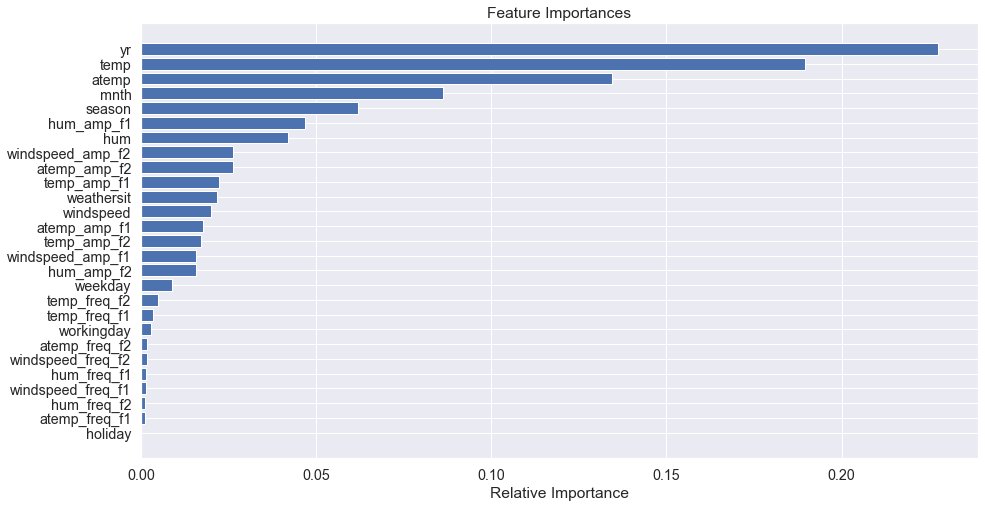

In [310]:
#feature importances based on analysis using random forest

temp = pd.DataFrame(zip(df_train.columns, regr1.feature_importances_), columns=['feature','imp'])
temp = temp.sort_values('imp')

fig = plt.figure(figsize=(15,8))
plt.title('Feature Importances')
plt.barh(temp['feature'], temp['imp'], color='b', align='center')
#plt.yticks(range(temp.shape[0])), [temp[i] for i in features])
plt.xlabel('Relative Importance')
plt.show()

In [311]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"n_estimators":sp_randint(10,100),
              "min_samples_split": sp_randint(1,10),
              "min_samples_leaf": sp_randint(1,10)}

clf_rf = RandomForestRegressor(max_features='sqrt', random_state=25,n_jobs=-1)

regr2 = RandomizedSearchCV(clf_rf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='neg_mean_absolute_error',random_state=25)

regr2.fit(df_train, df_train_target)
print(regr2.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=38, n_jobs=-1, oob_score=False,
                      random_state=25, verbose=0, warm_start=False)


In [312]:
regr2 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=3,min_samples_split=9,n_estimators=38, n_jobs=-1, random_state=25)
regr2.fit(df_train, df_train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=38, n_jobs=-1, oob_score=False,
                      random_state=25, verbose=0, warm_start=False)

In [313]:
y_pred = regr2.predict(df_test)
rndf2_test_predictions = [round(value) for value in y_pred]
y_pred = regr2.predict(df_train)
rndf2_train_predictions = [round(value) for value in y_pred]

### Using XgBoost Regressor

In [322]:
import xgboost as xgb

param_dist = {"learning_rate":[0.01,0.1],
              "max_depth": [1,3,5,7,9, 10],
              "n_estimators": [1000],
              "nthread": [1,2,3,4,5]}

clf_xgb = xgb.XGBRegressor()

x_model2 = RandomizedSearchCV(clf_xgb, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='neg_mean_absolute_error',random_state=25)

x_model2.fit(df_train, df_train_target)
print(x_model2.best_estimator_)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=3, nthread=3, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


In [385]:
x_model2 = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=650,
 max_depth=3,
 min_child_weight=0.7,
 gamma=0,
 subsample=1,
 reg_alpha=20, reg_lambda=200,
 colsample_bytree=0.8,nthread=3)
x_model2.fit(df_train, df_train_target)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=0.7, missing=nan, monotone_constraints=None,
             n_estimators=650, n_jobs=3, nthread=3, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=20,
             reg_lambda=200, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [386]:
y_pred = x_model2.predict(df_test)
xgb2_test_predictions = [round(value) for value in y_pred]
y_pred = x_model2.predict(df_train)
xgb2_train_predictions = [round(value) for value in y_pred]

### Calculating the error metric values for various models

In [387]:
train_mape=[]
test_mape=[]
train_mse = []
test_mse = []

# Calculate MSE for all models
train_mse.append(mean_squared_error(df_train_target, lr_train_predictions))
train_mse.append(mean_squared_error(df_train_target, ridge_train_predictions))
train_mse.append(mean_squared_error(df_train_target, lasso_train_predictions))
train_mse.append(mean_squared_error(df_train_target,rndf2_train_predictions))
train_mse.append(mean_squared_error(df_train_target, xgb2_train_predictions))

test_mse.append(mean_squared_error(df_test_target, lr_test_predictions))
test_mse.append(mean_squared_error(df_test_target, ridge_test_predictions))
test_mse.append(mean_squared_error(df_test_target, lasso_test_predictions))
test_mse.append(mean_squared_error(df_test_target, rndf2_test_predictions))
test_mse.append(mean_squared_error(df_test_target, xgb2_test_predictions))


# Calculate MAPE for all models
train_mape.append((mean_absolute_error(df_train_target, lr_train_predictions))/(sum(df_train_target)/len(df_train_target)))
train_mape.append((mean_absolute_error(df_train_target, ridge_train_predictions))/(sum(df_train_target)/len(df_train_target)))
train_mape.append((mean_absolute_error(df_train_target, lasso_train_predictions))/(sum(df_train_target)/len(df_train_target)))
train_mape.append((mean_absolute_error(df_train_target,rndf2_train_predictions))/(sum(df_train_target)/len(df_train_target)))
train_mape.append((mean_absolute_error(df_train_target, xgb2_train_predictions))/(sum(df_train_target)/len(df_train_target)))

test_mape.append((mean_absolute_error(df_test_target, lr_test_predictions))/(sum(df_test_target)/len(df_test_target)))
test_mape.append((mean_absolute_error(df_test_target, ridge_test_predictions))/(sum(df_test_target)/len(df_test_target)))
test_mape.append((mean_absolute_error(df_test_target, lasso_test_predictions))/(sum(df_test_target)/len(df_test_target)))
test_mape.append((mean_absolute_error(df_test_target, rndf2_test_predictions))/(sum(df_test_target)/len(df_test_target)))
test_mape.append((mean_absolute_error(df_test_target, xgb2_test_predictions))/(sum(df_test_target)/len(df_test_target)))


We have chosen our error metric for comparison between models as MAPE (Mean Absolute Percentage Error) so that we can know that on an average how good is our model with predictions and MSE (Mean Squared Error) is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value.

In [388]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Linear Regression -                          Train: ",train_mse[0],"      Test: ",test_mse[0])
print ("Ridge regression                 -           Train: ",train_mse[1],"      Test: ",test_mse[1])
print ("Lasso Regression -                           Train: ",train_mse[2],"      Test: ",test_mse[2])
print ("Random Forest Regression -                   Train: ",train_mse[3],"      Test: ",test_mse[3])
print ("XgBoost Regression -                         Train: ",train_mse[4],"      Test: ",test_mse[4])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MSE
--------------------------------------------------------------------------------------------------------
Linear Regression -                          Train:  681665.5085714286       Test:  1939286.322580645
Ridge regression                 -           Train:  687205.7828571429       Test:  1993628.5806451612
Lasso Regression -                           Train:  687205.7828571429       Test:  2147692.3225806453
Random Forest Regression -                   Train:  258151.29571428572       Test:  1203023.2580645161
XgBoost Regression -                         Train:  420095.6742857143       Test:  1107384.2258064516
--------------------------------------------------------------------------------------------------------


In [389]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Linear Regression -                          Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Ridge regression                 -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Lasso Regression -                           Train: ",train_mape[2],"      Test: ",test_mape[2])
print ("Random Forest Regression -                   Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("XgBoost Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Linear Regression -                          Train:  0.13713495190544803       Test:  0.2708042000436494
Ridge regression                 -           Train:  0.13772757423083745       Test:  0.2732453339584361
Lasso Regression -                           Train:  0.13772757423083745       Test:  0.28325236636408463
Random Forest Regression -                   Train:  0.08106839896672921       Test:  0.2369274045573222
XgBoost Regression -                         Train:  0.10732081063665562       Test:  0.2184168195743374
--------------------------------------------------------------------------------------------------------


Note: here in this notebook i used fourier transform features as new features. We can try with more different features using the casual and resgistered features. Here are some of the features that can be used.
    - Moving average (ration between registered and casual user per day)
    - similarly weighted average
    - Exponential moving average

Also we can perform more hyper parameter tuning for all of the above models to get a better result. As per our MAPE score we can say that our xgboost model performs best among all the other models.